In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import ast
import tikzplotlib
from common import analyse_results, expand_sparsity_explanation_rate

In [2]:
sns.set_theme(style='white', palette='deep')
sns.set_context('paper', font_scale=2)

# Analyze Results for the UCI Dataset

## 1. Data Loading

### 1.1. Load the results

In [3]:
# Load results for CoDy
cody_random = pd.read_parquet('../results/uci/cody/results_uci_cftgnnexplainer_random.parquet')
cody_recent = pd.read_parquet('../results/uci/cody/results_uci_cftgnnexplainer_recent.parquet')
cody_closest = pd.read_parquet('../results/uci/cody/results_uci_cftgnnexplainer_closest.parquet')
cody_1_best = pd.read_parquet('../results/uci/cody/results_uci_cftgnnexplainer_1-best.parquet')

cody_random_w = pd.read_parquet('../results/uci/cody/results_uci_cftgnnexplainer_random_wrong_only.parquet')
cody_recent_w = pd.read_parquet('../results/uci/cody/results_uci_cftgnnexplainer_recent_wrong_only.parquet')
cody_closest_w = pd.read_parquet('../results/uci/cody/results_uci_cftgnnexplainer_closest_wrong_only.parquet')
cody_1_best_w = pd.read_parquet('../results/uci/cody/results_uci_cftgnnexplainer_1-best_wrong_only.parquet')

In [4]:
# Load results for Greedy Baseline
greedy_random = pd.read_parquet('../results/uci/greedy/results_uci_greedy_random.parquet')
greedy_recent = pd.read_parquet('../results/uci/greedy/results_uci_greedy_recent.parquet')
greedy_closest = pd.read_parquet('../results/uci/greedy/results_uci_greedy_closest.parquet')
greedy_1_best = pd.read_parquet('../results/uci/greedy/results_uci_greedy_1-best.parquet')

greedy_random_w = pd.read_parquet('../results/uci/greedy/results_uci_greedy_random_wrong_only.parquet')
greedy_recent_w = pd.read_parquet('../results/uci/greedy/results_uci_greedy_recent_wrong_only.parquet')
greedy_closest_w = pd.read_parquet('../results/uci/greedy/results_uci_greedy_closest_wrong_only.parquet')
greedy_1_best_w = pd.read_parquet('../results/uci/greedy/results_uci_greedy_1-best_wrong_only.parquet')

In [5]:
# Load resutls from TGNNExplainer
tgnnex = pd.read_parquet('../results/uci/tgnnexplainer/results_uci_tgnnexplainer.parquet')

tgnnex_w = pd.read_parquet('../results/uci/tgnnexplainer/results_uci_tgnnexplainer_wrong_only.parquet')

### 1.2. Run analysis

In [6]:
# Analyze results for CoDy
results_cody_random = analyse_results(cody_random, 'random')
results_cody_recent = analyse_results(cody_recent, 'recent')
results_cody_closest = analyse_results(cody_closest, 'closest')
results_cody_1_best = analyse_results(cody_1_best, '1-best')

results_cody_random_w = analyse_results(cody_random_w, 'random')
results_cody_recent_w = analyse_results(cody_recent_w, 'recent')
results_cody_closest_w = analyse_results(cody_closest_w, 'closest')
results_cody_1_best_w = analyse_results(cody_1_best_w, '1-best')

In [7]:
# Analyze results for Greedy Baseline
results_greedy_random = analyse_results(greedy_random, 'random')
results_greedy_recent = analyse_results(greedy_recent, 'recent')
results_greedy_closest = analyse_results(greedy_closest, 'closest')
results_greedy_1_best = analyse_results(greedy_1_best, '1-best')

results_greedy_random_w = analyse_results(greedy_random_w, 'random')
results_greedy_recent_w = analyse_results(greedy_recent_w, 'recent')
results_greedy_closest_w = analyse_results(greedy_closest_w, 'closest')
results_greedy_1_best_w = analyse_results(greedy_1_best_w, '1-best')

In [8]:
# Analyze results for TGNNExplainer

tgnnex['cf_example_event_ids'] = tgnnex['explanation_event_ids']
tgnnex['orig_prediction_tgnnexplainer'] = tgnnex['original_prediction']
tgnnex.drop('original_prediction', axis=1, inplace=True)
tgnnex = pd.merge(tgnnex, cody_random[['explained_event_id', 'original_prediction']], how='inner', on='explained_event_id')
tgnnex['achieves_counterfactual_explanation'] = tgnnex['original_prediction'] * tgnnex['counterfactual_prediction'] < 0

tgnnex_w['cf_example_event_ids'] = tgnnex_w['explanation_event_ids']
tgnnex_w['orig_prediction_tgnnexplainer'] = tgnnex_w['original_prediction']
tgnnex_w.drop('original_prediction', axis=1, inplace=True)
tgnnex_w = pd.merge(tgnnex_w, cody_random_w[['explained_event_id', 'original_prediction']], how='inner', on='explained_event_id')
tgnnex_w['achieves_counterfactual_explanation'] = tgnnex_w['original_prediction'] * tgnnex_w['counterfactual_prediction'] < 0

results_tgnnex = analyse_results(tgnnex, '-')

results_tgnnex_w = analyse_results(tgnnex_w, '-')

### 1.3. Put data into dataframes

In [9]:
# Instantiate CoDy dataframes
for dataframe in [results_cody_random, results_cody_recent, results_cody_closest, results_cody_1_best]:
    dataframe['Explainer'] = 'CoDy'
cody = pd.DataFrame([results_cody_random, results_cody_recent, results_cody_closest, results_cody_1_best])
results_cody_random = pd.DataFrame([results_cody_random])
results_cody_recent = pd.DataFrame([results_cody_recent])
results_cody_closest = pd.DataFrame([results_cody_closest])
results_cody_1_best = pd.DataFrame([results_cody_1_best])

for dataframe in [results_cody_random_w, results_cody_recent_w, results_cody_closest_w, results_cody_1_best_w]:
    dataframe['Explainer'] = 'CoDy'
cody_w = pd.DataFrame([results_cody_random_w, results_cody_recent_w, results_cody_closest_w, results_cody_1_best_w])
results_cody_random_w = pd.DataFrame([results_cody_random_w])
results_cody_recent_w = pd.DataFrame([results_cody_recent_w])
results_cody_closest_w = pd.DataFrame([results_cody_closest_w])
results_cody_1_best_w = pd.DataFrame([results_cody_1_best_w])

In [10]:
# Instantiate Greedy Baseline dataframes
for dataframe in [results_greedy_random, results_greedy_recent, results_greedy_closest, results_greedy_1_best]:
    dataframe['Explainer'] = 'Greedy'
greedy = pd.DataFrame([results_greedy_random, results_greedy_recent, results_greedy_closest, results_greedy_1_best])
results_greedy_random = pd.DataFrame([results_greedy_random])
results_greedy_recent = pd.DataFrame([results_greedy_recent])
results_greedy_closest = pd.DataFrame([results_greedy_closest])
results_greedy_1_best = pd.DataFrame([results_greedy_1_best])

for dataframe in [results_greedy_random_w, results_greedy_recent_w, results_greedy_closest_w, results_greedy_1_best_w]:
    dataframe['Explainer'] = 'Greedy'
greedy_w = pd.DataFrame([results_greedy_random_w, results_greedy_recent_w, results_greedy_closest_w, results_greedy_1_best_w])
results_greedy_random_w = pd.DataFrame([results_greedy_random_w])
results_greedy_recent_w = pd.DataFrame([results_greedy_recent_w])
results_greedy_closest_w = pd.DataFrame([results_greedy_closest_w])
results_greedy_1_best_w = pd.DataFrame([results_greedy_1_best_w])

In [11]:
# Instantiate TGNNExplainer dataframes
results_tgnnex['Explainer'] = 'TGNNExplainer'
tgnnexplainer = pd.DataFrame([results_tgnnex])

results_tgnnex_w['Explainer'] = 'TGNNExplainer'
tgnnexplainer_w = pd.DataFrame([results_tgnnex_w])

In [12]:
# Combined datasets
correct_predictions = pd.concat([cody, greedy, tgnnexplainer])

wrong_predictions = pd.concat([cody_w, greedy_w, tgnnexplainer_w])

In [13]:
results_cody_1_best_e = expand_sparsity_explanation_rate(results_cody_1_best)
results_cody_closest_e = expand_sparsity_explanation_rate(results_cody_closest)
results_cody_random_e = expand_sparsity_explanation_rate(results_cody_random)
results_cody_recent_e = expand_sparsity_explanation_rate(results_cody_recent)

results_greedy_1_best_e = expand_sparsity_explanation_rate(results_greedy_1_best)
results_greedy_closest_e = expand_sparsity_explanation_rate(results_greedy_closest)
results_greedy_random_e = expand_sparsity_explanation_rate(results_greedy_random)
results_greedy_recent_e = expand_sparsity_explanation_rate(results_greedy_recent)

tgnnexplainer_e = expand_sparsity_explanation_rate(tgnnexplainer)


results_cody_1_best_w_e = expand_sparsity_explanation_rate(results_cody_1_best_w)
results_cody_closest_w_e = expand_sparsity_explanation_rate(results_cody_closest_w)
results_cody_random_w_e = expand_sparsity_explanation_rate(results_cody_random_w)
results_cody_recent_w_e = expand_sparsity_explanation_rate(results_cody_recent_w)

results_greedy_1_best_w_e = expand_sparsity_explanation_rate(results_greedy_1_best_w)
results_greedy_closest_w_e = expand_sparsity_explanation_rate(results_greedy_closest_w)
results_greedy_random_w_e = expand_sparsity_explanation_rate(results_greedy_random_w)
results_greedy_recent_w_e = expand_sparsity_explanation_rate(results_greedy_recent_w)

tgnnexplainer_w_e = expand_sparsity_explanation_rate(tgnnexplainer_w)

### 1.4. Set Mappings

In [14]:
explainer_mapping = {
    'CoDy': 'o',
    'Greedy': 'X',
    'TGNNExplainer': 'v'
}

selection_strategy_mapping = {
    'random': 'tab:green',
    'closest': 'tab:red',
    'recent': 'tab:orange',
    '1-best': 'tab:blue',
    '-': 'k'
}

## 2. Analysis

### 2.1. Fidelity Analysis

$fid_+ = 1 - \frac{1}{N} \sum_{i = 1}^N \mathbb{1}(p(f(\mathcal{G}(t_i)), \varepsilon_i) = p(f(\mathcal{G}(t_i) \setminus \mathcal{X}_{\varepsilon_i}, \varepsilon_i)))$

$fid_- = 1 - \frac{1}{N} \sum_{i = 1}^N \mathbb{1}(p(f(\mathcal{G}(t_i)), \varepsilon_i) = p(f(\mathcal{X}_{\varepsilon_i}, \varepsilon_i)))$

$sparsity = \frac{1}{N} \sum_{i = 1}^N \frac{|\mathcal{X}_{\varepsilon_i}|}{|C(\mathcal{G}, \varepsilon_i, k, m_{max})|}$

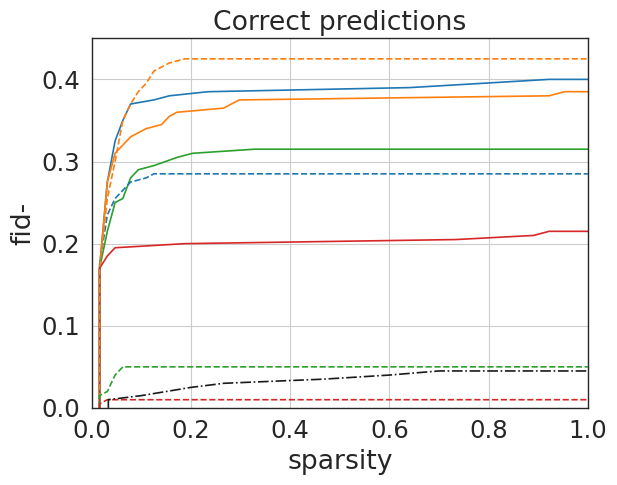

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(results_cody_1_best_e['sparsity'], results_cody_1_best_e['explanation rate'], color='tab:blue')
ax.plot(results_cody_recent_e['sparsity'], results_cody_recent_e['explanation rate'], color='tab:orange')
ax.plot(results_cody_random_e['sparsity'], results_cody_random_e['explanation rate'], color='tab:green')
ax.plot(results_cody_closest_e['sparsity'], results_cody_closest_e['explanation rate'], color='tab:red')

ax.plot(results_greedy_1_best_e['sparsity'], results_greedy_1_best_e['explanation rate'], color='tab:blue', linestyle='dashed')
ax.plot(results_greedy_recent_e['sparsity'], results_greedy_recent_e['explanation rate'], color='tab:orange', linestyle='dashed')
ax.plot(results_greedy_random_e['sparsity'], results_greedy_random_e['explanation rate'], color='tab:green', linestyle='dashed')
ax.plot(results_greedy_closest_e['sparsity'], results_greedy_closest_e['explanation rate'], color='tab:red', linestyle='dashed')

ax.plot(tgnnexplainer_e['sparsity'], tgnnexplainer_e['explanation rate'], color='k', linestyle='-.')

ax.set_xlim([0, 1])
ax.set_ylim([0, 0.45])

ax.set_title('Correct predictions')

plt.xlabel('sparsity')
plt.ylabel('fid-')

plt.grid(True)

tikzplotlib.save('../plots/fid_spar_uci.tex')
plt.savefig('../plots/svg/fid_spar_uci.svg')

plt.show()

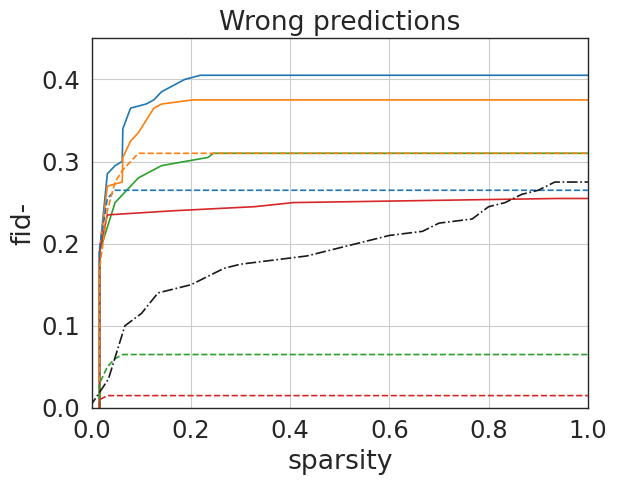

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(results_cody_1_best_w_e['sparsity'], results_cody_1_best_w_e['explanation rate'], color='tab:blue')
ax.plot(results_cody_recent_w_e['sparsity'], results_cody_recent_w_e['explanation rate'], color='tab:orange')
ax.plot(results_cody_random_w_e['sparsity'], results_cody_random_w_e['explanation rate'], color='tab:green')
ax.plot(results_cody_closest_w_e['sparsity'], results_cody_closest_w_e['explanation rate'], color='tab:red')

ax.plot(results_greedy_1_best_w_e['sparsity'], results_greedy_1_best_w_e['explanation rate'], color='tab:blue', linestyle='dashed')
ax.plot(results_greedy_recent_w_e['sparsity'], results_greedy_recent_w_e['explanation rate'], color='tab:orange', linestyle='dashed')
ax.plot(results_greedy_random_w_e['sparsity'], results_greedy_random_w_e['explanation rate'], color='tab:green', linestyle='dashed')
ax.plot(results_greedy_closest_w_e['sparsity'], results_greedy_closest_w_e['explanation rate'], color='tab:red', linestyle='dashed')

ax.plot(tgnnexplainer_w_e['sparsity'], tgnnexplainer_w_e['explanation rate'], color='k', linestyle='-.')

ax.set_xlim([0, 1])
ax.set_ylim([0, 0.45])

ax.set_title('Wrong predictions')

plt.xlabel('sparsity')
plt.ylabel('fid-')

plt.grid(True)

tikzplotlib.save('../plots/fid_spar_uci_wrong.tex')

plt.savefig('../plots/svg/fid_spar_uci_wrong.svg')

plt.show()

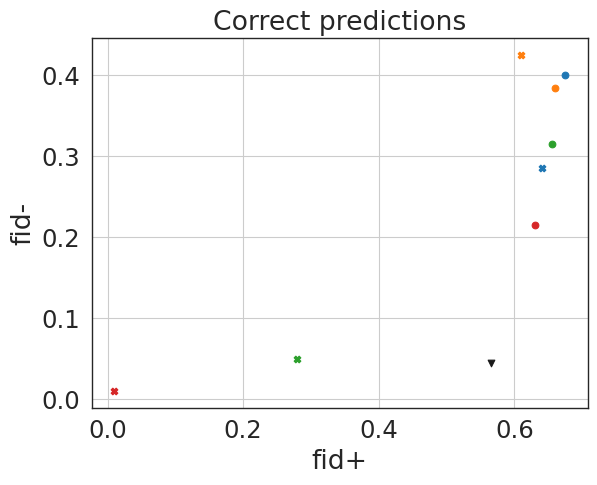

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for index, row in correct_predictions.iterrows():
    ax.scatter(row['fidelity_plus'], row['fidelity_minus'], c=selection_strategy_mapping[row['Selection strategy']], marker=explainer_mapping[row['Explainer']])

ax.set_title('Correct predictions')

plt.xlabel('fid+')
plt.ylabel('fid-')

plt.grid(True)

tikzplotlib.save('../plots/fid_plus_minus_uci.tex')

plt.savefig('../plots/svg/fid_plus_minus_ucim.svg')

plt.show()

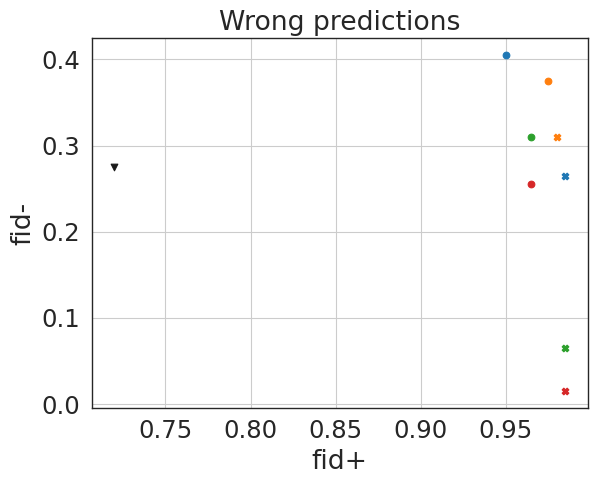

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for index, row in wrong_predictions.iterrows():
    ax.scatter(row['fidelity_plus'], row['fidelity_minus'], c=selection_strategy_mapping[row['Selection strategy']], marker=explainer_mapping[row['Explainer']])

ax.set_title('Wrong predictions')

plt.xlabel('fid+')
plt.ylabel('fid-')

plt.grid(True)

tikzplotlib.save('../plots/fid_plus_minus_uci_wrong.tex')

plt.savefig('../plots/svg/fid_plus_minus_uci_wrong.svg')

plt.show()

### 2.2. Runtime

/home/daniel/miniconda3/envs/analysis/lib/python3.9/site-packages/tikzplotlib/_hatches.py:65: UserWarning: tikzplotlib: Hatch '////' cannot be rendered. Only single character hatches are supported, e.g., {'/', '\', '|', '-', '+', 'x', 'o', 'O', '.', '*'}. Hatch '/' will be used.
  warnings.warn(


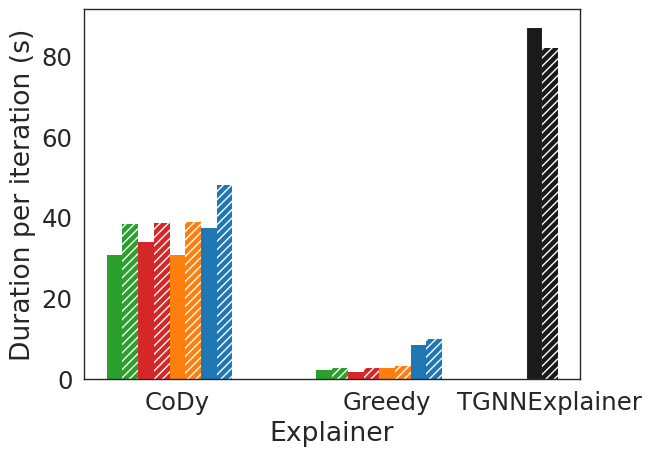

In [19]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

x = np.arange(2)

width = 0.075
multiplier = 0


for selection_strategy in [selection_strategy for selection_strategy in selection_strategy_mapping.keys() if selection_strategy != '-']:
    offset = width * multiplier
    durations = correct_predictions[correct_predictions['Selection strategy'] == selection_strategy]['Duration'].to_numpy()
    ax.bar(x + offset, durations, width, color=selection_strategy_mapping[selection_strategy], linewidth=0)
    multiplier += 1
    
    offset = width * multiplier
    durations = wrong_predictions[wrong_predictions['Selection strategy'] == selection_strategy]['Duration'].to_numpy()
    ax.bar(x + offset, durations, width, color=selection_strategy_mapping[selection_strategy], hatch='////', linewidth=0)
    multiplier += 1

ax.bar(2, tgnnex['total_duration'][0]/1000000000, width, color='k')
ax.bar(2 + width, tgnnex_w['total_duration'][0]/1000000000, width, color='k', hatch='////', linewidth=0)

ax.set_xticks((0.3, 1.3, 2.075), ('CoDy', 'Greedy', 'TGNNExplainer'))
ax.set_ylabel('Duration per iteration (s)')
ax.set_xlabel('Explainer')

tikzplotlib.save('../plots/duration_uci.tex')

plt.savefig('../plots/svg/duration_uci.svg')
    
plt.show()

### 2.3. Fidelity over Iterations

In [20]:
def fid_over_iterations(df:pd.DataFrame):
    iteration_sum = [-0.0000001]
    iterations = [-0.0000001]
    for iteration in np.sort(df['cf_example_step'].unique()):
        iterations.append(iteration)
        iteration_sum.append(len(df[df['cf_example_step'] <= iteration]))
    iterations = np.array(iterations[:-1])
    fid_minus = np.array(iteration_sum[:-1])/len(df)
    return iterations, fid_minus

In [21]:
cody_recent_1200 = pd.read_parquet('../results/uci/alterations/results_uci_cftgnnexplainer_recent_1200.parquet')
it, fid = fid_over_iterations(cody_recent_1200)

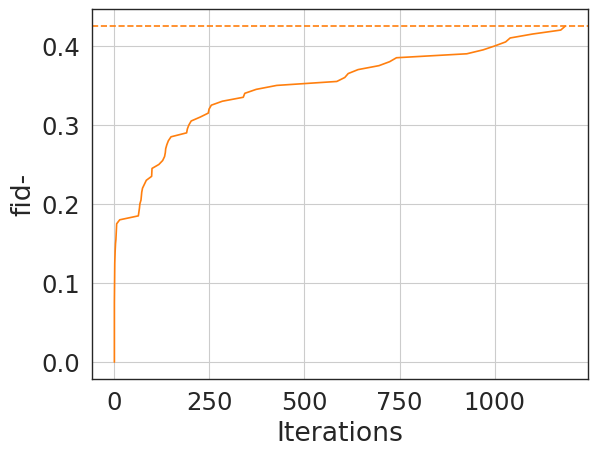

In [22]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(it, fid, color='tab:orange')
ax.axhline(y=results_greedy_recent['fidelity_minus'][0], color='tab:orange', linestyle='dashed')
ax.plot(results_greedy_recent['fidelity_minus'][0], color='tab:orange')

ax.set_ylabel('fid-')
ax.set_xlabel('Iterations')

plt.grid(True)

tikzplotlib.save('../plots/fid_it_uci.tex')

plt.savefig('../plots/svg/fid_it_uci.svg')

plt.show()

## 3. Tabular Analysis

### 3.1. Performance Overview

In [23]:
correct_predictions[['Explainer', 'Selection strategy', 'fidelity_plus', 'fidelity_minus', 'sparsity', 'sparsity_all']].to_csv('../tables/uci_correct.csv')
correct_predictions[['Explainer', 'Selection strategy', 'fidelity_plus', 'fidelity_minus', 'sparsity', 'sparsity_all']]

,Explainer,Selection strategy,fidelity_plus,fidelity_minus,sparsity,sparsity_all
0,CoDy,random,0.655,0.315,0.044147,0.085938
1,CoDy,recent,0.660,0.385,0.069602,0.097109
2,CoDy,closest,0.630,0.215,0.080305,0.078437
3,CoDy,1-best,0.675,0.400,0.066016,0.087266
0,Greedy,random,0.280,0.050,0.039062,0.023906
1,Greedy,recent,0.610,0.425,0.044485,0.047500
2,Greedy,closest,0.010,0.010,0.023438,0.022422
3,Greedy,1-best,0.640,0.285,0.028509,0.043672
0,TGNNExplainer,-,0.565,0.045,0.288889,0.293023


In [24]:
wrong_predictions[['Explainer', 'Selection strategy', 'fidelity_plus', 'fidelity_minus', 'sparsity', 'sparsity_all']].to_csv('../tables/uci_wrong.csv')
wrong_predictions[['Explainer', 'Selection strategy', 'fidelity_plus', 'fidelity_minus', 'sparsity', 'sparsity_all']]

,Explainer,Selection strategy,fidelity_plus,fidelity_minus,sparsity,sparsity_all
0,CoDy,random,0.965,0.310,0.042256,0.056235
1,CoDy,recent,0.975,0.375,0.041025,0.049926
2,CoDy,closest,0.965,0.255,0.053140,0.053561
3,CoDy,1-best,0.950,0.405,0.043001,0.056176
0,Greedy,random,0.985,0.065,0.028846,0.019502
1,Greedy,recent,0.980,0.310,0.029486,0.034791
2,Greedy,closest,0.985,0.015,0.020833,0.025731
3,Greedy,1-best,0.985,0.265,0.020342,0.028330
0,TGNNExplainer,-,0.720,0.275,0.324848,0.346601


### 3.2. Export Scatter

In [26]:
correct_predictions['meta'] = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']
wrong_predictions['meta'] = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

correct_predictions[['meta', 'fidelity_minus', 'fidelity_plus']].to_csv('../tables/uci_fid_correct.csv', index=None, header=['meta', 'fid_min', 'fid_pl'])
wrong_predictions[['meta', 'fidelity_minus', 'fidelity_plus']].to_csv('../tables/uci_fid_wrong.csv', index=None, header=['meta', 'fid_min', 'fid_pl'])